In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
training_df = pd.read_csv('5challenge_training_samarth.csv', index_col = 0)

training_df.head()

,Class,Feature 0,Feature 1
0,1,1.113173,-0.142751
1,0,-0.395060,-0.351427
2,0,-0.742386,-0.911516
3,1,1.249702,-0.861662
4,1,0.500867,-0.516831


In [3]:
X = training_df[['Feature 0', 'Feature 1']].values
Y = training_df[['Class']].values.ravel()

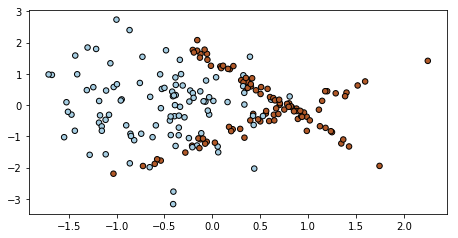

In [107]:
plt.rcParams['figure.figsize'] = [7.5, 3.75]

plt.scatter(X[:, 0], X[:, 1], c=Y, s=30, edgecolor='k')
plt.show()

In [6]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30) 

In [8]:
from sklearn.model_selection import GridSearchCV

In [181]:
# Grid Search
C_range = np.logspace(-2,2,10).tolist()
gamma_range = np.logspace(-2,2,10).tolist()
param_grid = dict(gamma=gamma_range, C=C_range) 
    
clf = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, verbose=1)
clf.fit(X_train, Y_train)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
Y_test, Y_pred = Y_test, clf.predict(X_test)
print(classification_report(Y_test,Y_pred))
print()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters set found on training set:

{'C': 35.93813663804626, 'gamma': 0.0774263682681127}

Grid scores on training set:

              precision    recall  f1-score   support

           0       0.94      0.71      0.81        24
           1       0.83      0.97      0.90        36

   micro avg       0.87      0.87      0.87        60
   macro avg       0.89      0.84      0.85        60
weighted avg       0.88      0.87      0.86        60




[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [182]:
# Grid Search
# Parameter Grid
C_range = np.linspace(clf.best_params_['C']-0.5*clf.best_params_['C'],clf.best_params_['C']+0.5*clf.best_params_['C'],15).tolist()
gamma_range = np.linspace(clf.best_params_['gamma']-0.5*clf.best_params_['gamma'],clf.best_params_['gamma']-0.5*clf.best_params_['gamma'],15).tolist()
param_grid = dict(gamma=gamma_range, C=C_range) 
    
clf = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, verbose=1)
clf.fit(X_train, Y_train)

print("Best parameters set found on training set:")
print()
print(clf.best_params_)
print()
print("Grid scores on training set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
Y_test, Y_pred = Y_test, clf.predict(X_test)
print(classification_report(Y_test,Y_pred))
print()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 225 candidates, totalling 675 fits
Best parameters set found on training set:

{'C': 51.34019519720894, 'gamma': 0.03871318413405635}

Grid scores on training set:

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        24
           1       0.85      0.94      0.89        36

   micro avg       0.87      0.87      0.87        60
   macro avg       0.88      0.85      0.86        60
weighted avg       0.87      0.87      0.86        60




[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    1.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [183]:
rbf = svm.SVC(kernel='rbf', C=clf.best_params_['C'], gamma=clf.best_params_['gamma']).fit(X_train, Y_train)

In [184]:
rbf = svm.SVC(kernel='rbf', C=10, gamma=0.5).fit(X_train, Y_train)

In [185]:
Y_pred = rbf.predict(X_test)

In [186]:
print(confusion_matrix(Y_test,Y_pred))  
print(classification_report(Y_test,Y_pred))

[[18  6]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84        24
           1       0.85      0.97      0.91        36

   micro avg       0.88      0.88      0.88        60
   macro avg       0.90      0.86      0.87        60
weighted avg       0.89      0.88      0.88        60



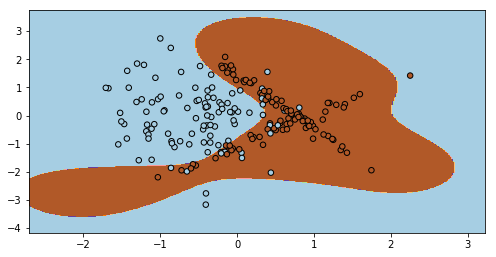

In [187]:
plt.rcParams['figure.figsize'] = [18, 9]

# create a mesh to plot in
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = 0.02 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.set_cmap(plt.cm.Paired)

for clf, i in zip([rbf], [0]):
    # Plot the decision boundary. For that, we will asign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.subplot(2, 2, i+1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.set_cmap(plt.cm.Paired)
    plt.contourf(xx, yy, Z)
    plt.axis('tight')

    # Plot also the training points
    fig = plt.scatter(X[:,0], X[:,1], c=Y, s=30, edgecolor='k')

plt.axis('tight')
plt.show()

In [188]:
testing_df = pd.read_csv('5challenge_testing_samarth.csv', index_col = 0)

testing_df.head()

,Class,Feature 0,Feature 1
0,NaN,-0.498315,-0.541779
1,NaN,-0.531833,1.130579
2,NaN,0.336289,0.943208
3,NaN,-0.109864,-0.512464
4,NaN,-0.621154,0.594152


In [189]:
Xt = testing_df[['Feature 0', 'Feature 1']].values
Yt = testing_df[['Class']].values.ravel()

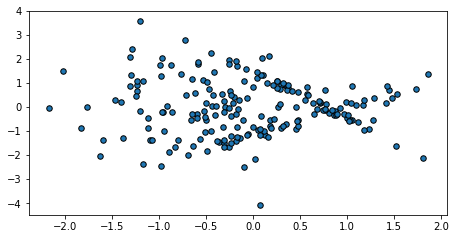

In [190]:
plt.rcParams['figure.figsize'] = [7.5, 3.75]

plt.scatter(Xt[:, 0], Xt[:, 1], s=30, edgecolor='k')
plt.show()

In [191]:
Yt_pred = rbf.predict(X)

In [192]:
testing_df['Class'] = Yt_pred.transpose()

In [193]:
testing_df.head()

,Class,Feature 0,Feature 1
0,1,-0.498315,-0.541779
1,0,-0.531833,1.130579
2,0,0.336289,0.943208
3,1,-0.109864,-0.512464
4,1,-0.621154,0.594152


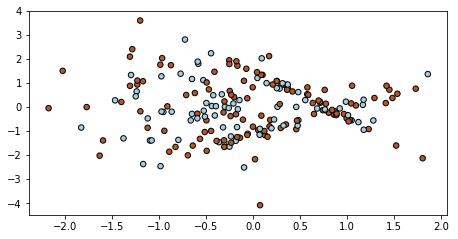

In [194]:
Xt = testing_df[['Feature 0', 'Feature 1']].values
Yt = testing_df[['Class']].values.ravel()

plt.rcParams['figure.figsize'] = [7.5, 3.75]

plt.scatter(Xt[:, 0], Xt[:, 1], c=Yt, s=30, edgecolor='k')
plt.show()

In [195]:
testing_df.to_csv('Submit/5challenge_testing_samarth.csv')